In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/combined_cleaned_data2/combined_with_fe.csv')
df.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1480\1060822742.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/combined_cleaned_data2/combined_with_fe.csv')


,Unnamed: 0.1,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_clean,sentiment
0,0,0,5,True,"09 24, 2013",A3CZ890UHC8HHZ,B0009RF9DW,{'Size:': ' 6.6 oz'},Amazon Customer,"It diffuses a very mild light perfume, just wh...",What I expected,1379980800,NaN,NaN,wear mild perfume nice strong lotion day perfu...,Positive
1,1,1,5,False,"07 12, 2014",A125TMC44CJBKK,B0012Y0ZG2,{'Size:': ' B-020'},Mustang Shelly,All time favorite!!!! Wish they still carried ...,Five Stars,1405123200,NaN,NaN,time still favorite carry wish,Positive
2,2,2,5,True,"12 28, 2014",A3JDSBP01M7R2R,B0012Y0ZG2,{'Size:': ' 112'},Tim A. Brooks,One of my wife's favorites.,Five Stars,1419724800,NaN,NaN,one favorites wife's,Positive
3,3,3,5,True,"03 3, 2014",A2HT5WENL8E5S6,B000FI4S1E,NaN,Shasta Masser,If you have body acne this product is a must. ...,Acne Body Wash A MUST,1393804800,NaN,NaN,heal help within prevent already first wash mu...,Positive
4,4,4,5,False,"11 7, 2014",A7LAYX9R7IMOO,B0012Y0ZG2,{'Size:': ' 123'},andre luiz,I really is what I expected,Five Stars,1415318400,NaN,NaN,expect really,Positive


In [3]:
df.drop(df.columns[[0, 1]], axis = 1, inplace=True)

In [4]:
df.dropna(subset=['reviewText', 'review_clean'], inplace=True)

In [5]:
df.drop(['reviewTime', 'asin', 'style', 'reviewerName', 'unixReviewTime', 'vote', 'image'], axis=1, inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# Encoded the target column
lb=LabelEncoder()
df['sentiment'] = lb.fit_transform(df['sentiment'])

In [8]:
df1 = df.loc[df['sentiment'] == 0]

In [12]:
df2 = df.loc[df['sentiment'] == 1]

In [13]:
print(df1.shape, df2.shape)

(11005, 7) (62378, 7)


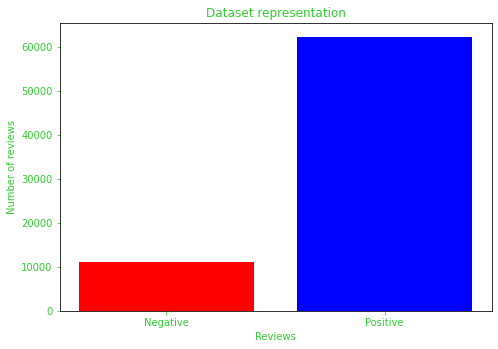

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
review = ['Negative', 'Positive']
num = [11005,62378]
plt.bar(review, num, color=['red', 'blue'])
plt.xlabel("Reviews", color='limegreen')
plt.ylabel("Number of reviews", color='limegreen')
plt.title('Dataset representation', color='limegreen')
plt.tick_params(axis='x', colors='limegreen')
plt.tick_params(axis='y', colors='limegreen')
plt.show()

In [14]:
df3 = df2.sample(n=11005)

In [15]:
df3.shape

(11005, 7)

In [17]:
df3.head()

,overall,verified,reviewerID,reviewText,summary,review_clean,sentiment
5761,5,True,ABRX0RQNRXX85,I bought these for my wife. She saw them in th...,My wife loves these shoes.,complains favorite buy warehouse store couple ...,1
11185,5,True,A3U3ZDX50JR3AJ,Love this stencil. Easy to use. Wish there w...,Daisies,rub use stencil like ons love easy pattern wish,1
63571,5,True,A31OIXDTDVNVS8,I bought this as a gift for my zombie hating s...,pretty awesome gift,buy zombie cherish hating time love long son gift,1
37118,5,True,A1ODE5OC69SBIF,Love how my hands feel,Hand cream,love hand feel,1
13499,5,True,A10SCUCFWNDJYH,thanks,Five Stars,thanks,1


In [18]:
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize 

In [22]:
df4 = df3.append(df1, ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1480\3197019190.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df4 = df3.append(df1, ignore_index=True)


In [23]:
df4.shape

(22010, 7)

In [24]:
df4.review_clean = df4.review_clean.astype(str)

In [26]:
corpus = df4['review_clean'].tolist()

In [27]:
from keras.preprocessing.sequence import pad_sequences

In [28]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df4['review_clean'].values)
X = tokenizer.texts_to_sequences(df4['review_clean'].values)
X = pad_sequences(X)

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
Y = pd.get_dummies(df4['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(14746, 581) (14746, 2)
(7264, 581) (7264, 2)


In [ ]:
from sklearn.utils import resample
from sklearn.utils import shuffle

In [ ]:
# Separate majority and minority classes
data_majority = df4[df4['sentiment'] == 'Positive']
data_minority = df4[df4['sentiment'] == 'Negative']

bias = data_minority.shape[0]/data_majority.shape[0]
# lets split train/test data first then 
train = pd.concat([data_majority.sample(frac=0.8,random_state=200),
         data_minority.sample(frac=0.8,random_state=200)])
test = pd.concat([data_majority.drop(data_majority.sample(frac=0.8,random_state=200).index),
        data_minority.drop(data_minority.sample(frac=0.8,random_state=200).index)])

train = shuffle(train)
test = shuffle(test)

In [ ]:
print('positive data in training:',(train.sentiment == 'Positive').sum())
print('negative data in training:',(train.sentiment == 'Negative').sum())
print('positive data in test:',(test.sentiment == 'Positive').sum())
print('negative data in test:',(test.sentiment == 'Negative').sum())

positive data in training: 49435
negative data in training: 8679
positive data in test: 12359
negative data in test: 2170


In [ ]:
# Separate majority and minority classes in training data for upsampling 
data_majority = train[train['sentiment'] == 'Positive']
data_minority = train[train['sentiment'] == 'Negative']

print("majority class before upsample:",data_majority.shape)
print("minority class before upsample:",data_minority.shape)

# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples= data_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])
 
# Display new class counts
print("After upsampling\n",data_upsampled.sentiment.value_counts(),sep = "")

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df4['reviewText'].values) # training with whole data

X_train = tokenizer.texts_to_sequences(data_upsampled['reviewText'].values)
X_train = pad_sequences(X_train,maxlen=488)
Y_train = pd.get_dummies(data_upsampled['sentiment']).values
print('x_train shape:',X_train.shape)

X_test = tokenizer.texts_to_sequences(test['reviewText'].values)
X_test = pad_sequences(X_test,maxlen=488)
Y_test = pd.get_dummies(test['sentiment']).values
print("x_test shape", X_test.shape)

majority class before upsample: (49435, 2)
minority class before upsample: (8679, 2)
After upsampling
Positive    49435
Negative    49435
Name: sentiment, dtype: int64
x_train shape: (98870, 488)
x_test shape (14529, 488)


In [32]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(2500, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 488, 128)          320000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 488, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 196)               254800    
                                                                 
 dense_1 (Dense)             (None, 2)                 394       
                                                                 
Total params: 575,194
Trainable params: 575,194
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
batch_size = 128
# also adding weights
class_weights = {0: 1 ,
                1: 1/bias }
model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 1,
          class_weight=class_weights)

Epoch 1/20
461/461 - 21s - loss: 0.5546 - accuracy: 0.7338 - 21s/epoch - 45ms/step
Epoch 2/20
461/461 - 19s - loss: 0.4120 - accuracy: 0.8133 - 19s/epoch - 42ms/step
Epoch 3/20
461/461 - 19s - loss: 0.3730 - accuracy: 0.8364 - 19s/epoch - 41ms/step
Epoch 4/20
461/461 - 19s - loss: 0.3484 - accuracy: 0.8471 - 19s/epoch - 42ms/step
Epoch 5/20
461/461 - 19s - loss: 0.3230 - accuracy: 0.8611 - 19s/epoch - 42ms/step
Epoch 6/20
461/461 - 19s - loss: 0.2986 - accuracy: 0.8740 - 19s/epoch - 42ms/step
Epoch 7/20
461/461 - 19s - loss: 0.2779 - accuracy: 0.8856 - 19s/epoch - 41ms/step
Epoch 8/20
461/461 - 19s - loss: 0.2637 - accuracy: 0.8933 - 19s/epoch - 40ms/step
Epoch 9/20
461/461 - 19s - loss: 0.2491 - accuracy: 0.8953 - 19s/epoch - 41ms/step
Epoch 10/20
461/461 - 19s - loss: 0.2308 - accuracy: 0.9059 - 19s/epoch - 41ms/step
Epoch 11/20
461/461 - 19s - loss: 0.2212 - accuracy: 0.9090 - 19s/epoch - 42ms/step
Epoch 12/20
461/461 - 20s - loss: 0.2023 - accuracy: 0.9158 - 20s/epoch - 43ms/step
E

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

In [ ]:
Y_pred = model.predict(X_test,batch_size = batch_size) 
Y_pred=np.argmax(Y_pred,axis=1)
df_test = pd.DataFrame({'true': Y_test.tolist(), 'pred':Y_pred})
df_test['true'] = df_test['true'].apply(lambda x: np.argmax(x))
print("confusion matrix",confusion_matrix(df_test.true, df_test.pred))
print(classification_report(df_test.true, df_test.pred))

confusion matrix [[ 1341   861]
 [  460 11867]]
              precision    recall  f1-score   support

           0       0.74      0.61      0.67      2202
           1       0.93      0.96      0.95     12327

    accuracy                           0.91     14529
   macro avg       0.84      0.79      0.81     14529
weighted avg       0.90      0.91      0.91     14529



In [47]:
model.save('model12.hdf5')